<a href="https://colab.research.google.com/github/poojakota17/Data-Mining-255/blob/main/Data_cleaning_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Below shows the log of the data cleaning practice done in OpenRefine for the Airbnb dataset**

Dataset : https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

Open Refine work video : https://drive.google.com/file/d/19YMhRNyOJEIxJbpgrbjx-JbuP5iGONqS/view?usp=sharing

  Remove column longitude

	Remove column latitude

	Remove column reviews_per_month

	Text transform on cells in column id using expression value.toNumber()

	Reorder rows

	Blank down cells in column id

	Text transform on cells in column price using expression value.toNumber()

	Text transform on cells in column host_id using expression value.toNumber()

	Text transform on cells in column price using expression value.toString()

	Remove rows
	Remove rows
	Remove rows
	Remove rows
	Remove rows

	Text transform on cells in column last_review using expression value.toDate()

	Text transform on cells in column price using expression value.toNumber()

	Text transform on cells in column minimum_nights using expression value.toNumber()

	Text transform on cells in column number_of_reviews using expression value.toNumber()

	Text transform on cells in column calculated_host_listings_count using expression value.toNumber()

	Text transform on cells in column availability_365 using expression value.toNumber()

	Move column price to position 12

	Mass edit cells in column room_type

	Mass edit cells in column room_type

	Mass edit cells in column room_type

	Text transform on cells in column room_type using expression value.toNumber()

	Mass edit cells in column neighbourhood_group

	Mass edit cells in column neighbourhood_group

	Mass edit cells in column neighbourhood_group

	Mass edit cells in column neighbourhood_group

	Mass edit cells in column neighbourhood_group

	Text transform on cells in column neighbourhood_group using expression value.toNumber()


In [1]:
from google.colab import files
uploaded = files.upload()

Saving AB-NYC-2019-csv.csv to AB-NYC-2019-csv.csv


In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import io
import seaborn as sns
from sklearn.model_selection import GridSearchCV , train_test_split
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.metrics import roc_auc_score , r2_score

df = pd.read_csv(io.StringIO(uploaded['AB-NYC-2019-csv.csv'].decode('utf-8')))
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365,price
0,2539,Clean & quiet apt home by the park,2787,John,2,Kensington,1,1,9,2018-10-19T00:00:00Z,6,365,149
1,2595,Skylit Midtown Castle,2845,Jennifer,3,Midtown,2,1,45,2019-05-21T00:00:00Z,2,355,225
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,3,Harlem,1,3,0,NaN,1,365,150
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,2,Clinton Hill,2,1,270,2019-07-05T00:00:00Z,1,194,89
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,3,East Harlem,2,10,9,2018-11-19T00:00:00Z,1,0,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48871,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,2,Bedford-Stuyvesant,1,2,0,NaN,2,9,70
48872,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,2,Bushwick,1,4,0,NaN,2,36,40
48873,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,3,Harlem,2,10,0,NaN,1,27,115
48874,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,3,Hell's Kitchen,0,1,0,NaN,6,2,55


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48876 entries, 0 to 48875
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              48876 non-null  int64 
 1   name                            48860 non-null  object
 2   host_id                         48876 non-null  int64 
 3   host_name                       48855 non-null  object
 4   neighbourhood_group             48876 non-null  int64 
 5   neighbourhood                   48876 non-null  object
 6   room_type                       48876 non-null  int64 
 7   minimum_nights                  48876 non-null  int64 
 8   number_of_reviews               48876 non-null  int64 
 9   last_review                     38828 non-null  object
 10  calculated_host_listings_count  48876 non-null  int64 
 11  availability_365                48876 non-null  int64 
 12  price                           48876 non-null

We will check which all columns has a null value.

In [4]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
room_type                             0
minimum_nights                        0
number_of_reviews                     0
last_review                       10048
calculated_host_listings_count        0
availability_365                      0
price                                 0
dtype: int64

We will replace the null(NaN) values with some values. For last_review we will add latest review date.

In [12]:
df.fillna({'reviews_per_month':0}, inplace=True)
df.fillna({'name':"Dummy"}, inplace=True)
df.fillna({'host_name':"Dummy"}, inplace=True)
df.fillna({'last_review':"2019-07-08T00:00:00Z"}, inplace=True)

Now we have no NaN values.

In [13]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
calculated_host_listings_count    0
availability_365                  0
price                             0
dtype: int64

We will find the correlation between the numerical columns in the dataset.

In [20]:
num_cols = ['price',
            'minimum_nights',
            'number_of_reviews',
            'calculated_host_listings_count',
           'neighbourhood','neighbourhood_group','room_type',
            'availability_365']

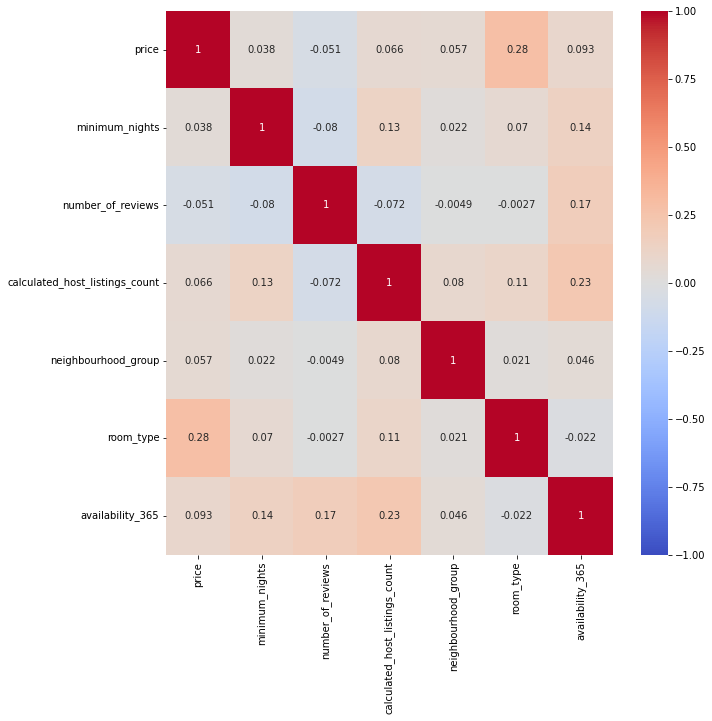

In [21]:
corr = df[num_cols].corr()
ax , fig  = plt.subplots(figsize =(10,10))
sns.heatmap(corr ,vmin = -1 , cmap='coolwarm', annot = True)
plt.show()

We will plot different types of neighbourhood group with respect to their prices and room type.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


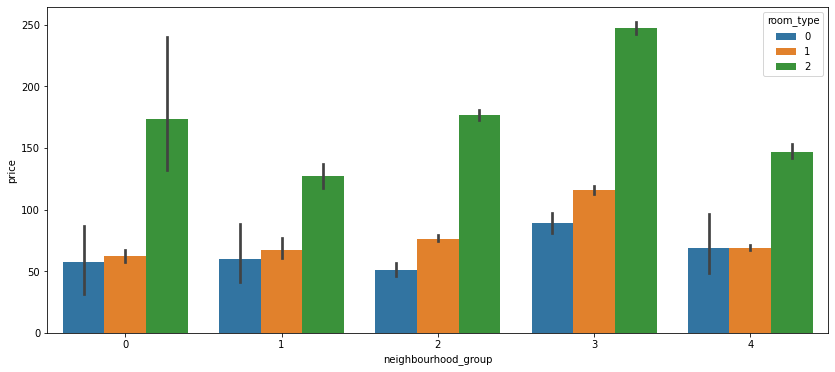

In [10]:
plt.figure(figsize=(14, 6));
sns.barplot(df['neighbourhood_group'], df['price'], hue=df['room_type']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


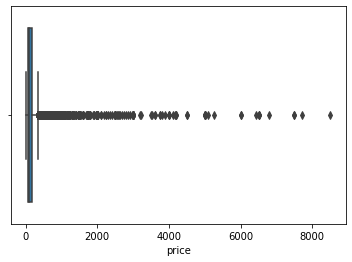

In [15]:
sns.boxplot(df['price'])

This shows the range of prices.

Coverting the remaining neighbourhood categorical data to numeric data.

In [23]:
cat_data = [  'neighbourhood' ]
le = LabelEncoder()
for col in cat_data:
    df[col] = le.fit_transform(df[col])
    df[col] = df[col].astype('int')

In [24]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365,price
0,2539,Clean & quiet apt home by the park,2787,John,2,108,1,1,9,2018-10-19T00:00:00Z,6,365,149
1,2595,Skylit Midtown Castle,2845,Jennifer,3,127,2,1,45,2019-05-21T00:00:00Z,2,355,225
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,3,94,1,3,0,2019-07-08T00:00:00Z,1,365,150
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,2,41,2,1,270,2019-07-05T00:00:00Z,1,194,89
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,3,61,2,10,9,2018-11-19T00:00:00Z,1,0,80


Now we will predict the price of a listing based upon certain features.

In [26]:

feature_data  = ['price' ,
                 'neighbourhood_group'  ,
                  'neighbourhood' ,
                  'room_type' ,
                 'minimum_nights' ,
                 'calculated_host_listings_count',
                 'availability_365']
df[feature_data].head()

,price,neighbourhood_group,neighbourhood,room_type,minimum_nights,calculated_host_listings_count,availability_365
0,149,2,108,1,1,6,365
1,225,3,127,2,1,2,355
2,150,3,94,1,3,1,365
3,89,2,41,2,1,1,194
4,80,3,61,2,10,1,0


We will drop the price column in the train data.

In [27]:
new_df = df[feature_data]
y = new_df['price']
X = new_df.drop(['price'],axis=1)
X_train, X_test, y_train , y_test=train_test_split(X, y, test_size=0.2)

We will scale the data using StandardScaler

In [29]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

We will apply Decision Tree regression to predict the prices

In [31]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor(min_samples_leaf = 0.0001)
tree.fit(X_train,y_train)
y_pred_tree = tree.predict(X_test)
print('R-squared score (training): {:.3f}'.format(tree.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(tree.score(X_test, y_test)))

R-squared score (training): 0.403
R-squared score (test): 0.037


The metric for regression,R-squared error came out to be 0.403 for training data and 0.037 for testing data